# scout project Balint Part 3: dealing with outliers

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import warnings;
warnings.filterwarnings("ignore")
import re

In [8]:
df = pd.read_csv('data/clean_filled_auto_scout.csv')

## Price

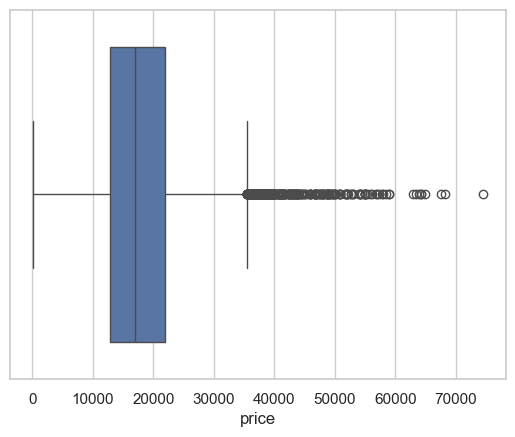

In [9]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df["price"])

In [10]:
df.sort_values(by = 'price').head()

,make_model,price,fuel,particulate_filter,multiple_fuel,gearingtype,air_conditioning,armrest,automatic_climate_control,cruise_control,...,gears,interior_material,warranty_months,drivechain,hp,displacement,cylinders,inspectionnew,weight,consumption_comb
8594,Opel Corsa,13,gasoline,0,1,Manual,1,0,0,1,...,5.0,Cloth,0.0,front,66.0,1398.0,4.0,No,1141.0,5.6
8828,Opel Corsa,120,gasoline,0,1,Manual,1,0,1,1,...,6.0,Cloth,0.0,front,66.0,999.0,3.0,No,1099.0,4.6
6066,Opel Astra,255,diesel,1,1,Manual,1,0,0,1,...,6.0,Cloth,0.0,front,100.0,1598.0,4.0,No,1403.0,3.8
8829,Opel Corsa,331,gasoline,0,1,Manual,1,1,1,1,...,6.0,Cloth,0.0,front,66.0,999.0,3.0,No,1163.0,4.6
8827,Opel Corsa,4950,diesel,1,1,Manual,1,0,1,0,...,5.0,Cloth,0.0,front,70.0,1248.0,4.0,No,1163.0,3.2


In [14]:
# Drop bottom four price outliers
df.drop(df.loc[df['price'] < 1000].index, inplace=True)
df.sort_values(by = 'price').head()

,make_model,price,fuel,particulate_filter,multiple_fuel,gearingtype,air_conditioning,armrest,automatic_climate_control,cruise_control,...,gears,interior_material,warranty_months,drivechain,hp,displacement,cylinders,inspectionnew,weight,consumption_comb
8827,Opel Corsa,4950,diesel,1,1,Manual,1,0,1,0,...,5.0,Cloth,0.0,front,70.0,1248.0,4.0,No,1163.0,3.2
8825,Opel Corsa,4990,gasoline,0,1,Manual,1,0,0,1,...,5.0,Cloth,0.0,front,66.0,1398.0,4.0,No,1141.0,5.2
8826,Opel Corsa,5250,diesel,0,1,Manual,1,0,0,0,...,5.0,Cloth,12.0,front,55.0,1248.0,4.0,No,1199.0,3.8
8824,Opel Corsa,5300,diesel,1,1,Manual,1,0,0,0,...,4.0,Cloth,0.0,front,55.0,1248.0,4.0,No,1237.0,3.9
13770,Renault Clio,5445,diesel,0,1,Manual,1,0,0,0,...,5.0,Cloth,0.0,front,55.0,1461.0,4.0,No,1146.0,3.6


## previous_owners

In [16]:
df.previous_owners.value_counts(dropna=False)

previous_owners
1.0    12165
0.0     2961
2.0      770
3.0       17
4.0        2
Name: count, dtype: int64

## horsepower

<Axes: xlabel='make_model', ylabel='hp'>

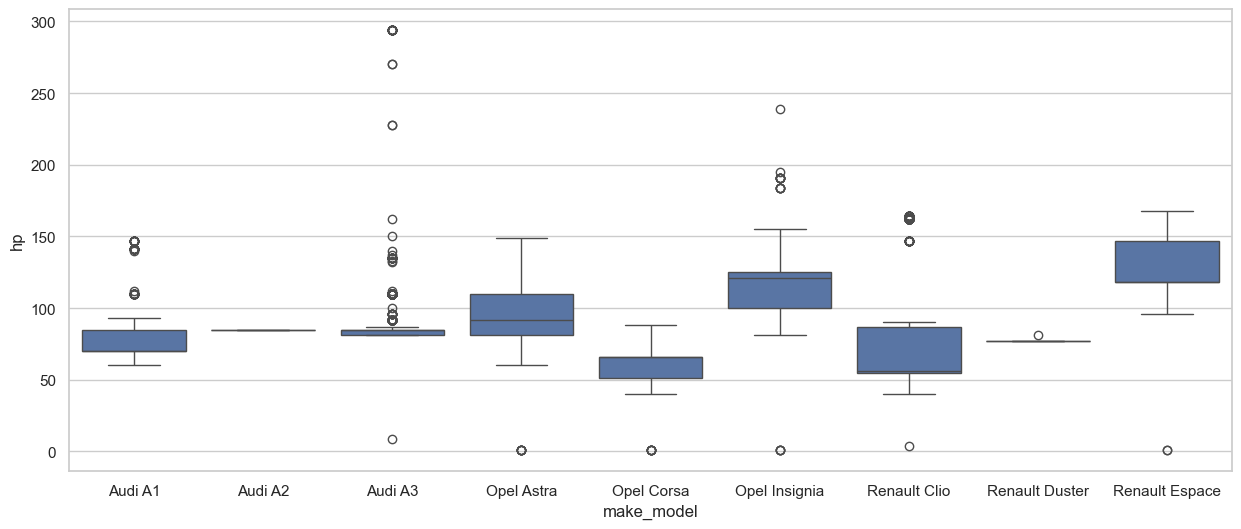

In [23]:
plt.figure(figsize=(15,6))
sns.boxplot(x = 'make_model', y= 'hp', data = df)

<Axes: xlabel='make_model', ylabel='hp'>

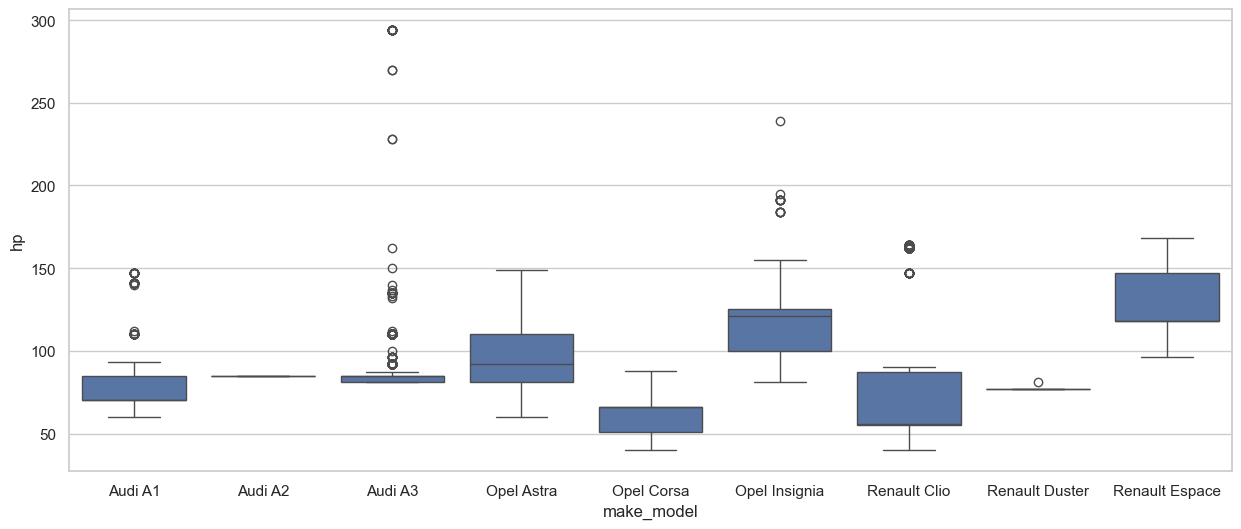

In [25]:
# Convert values <25 to np.nan
df.loc[df['hp'] < 25, 'hp'] = np.nan